# Lab 1: Python/Numpy/Matplotlib/Pandas Tutorials

This tutorial was originally written by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for cs231n Stanford course. This version has been adapted by [Ivan Donadello](https://scholar.google.it/citations?user=NpmfDzsAAAAJ&hl=it&oi=ao) for the Spring 2025 edition of the [Machine Learning in Practice course](https://ole.unibz.it/course/view.php?id=9633). It runs Python3 by default.

## Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

We expect that many of you will have some experience with Java and programming. You will learn a new programming language and paradigm.

Some of you may have previous knowledge in Matlab, in which case we also recommend the numpy for Matlab users page (https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).

In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* Exercises

## A Brief Note on Python Versions

As of Janurary 1, 2020, Python has [officially dropped support](https://www.python.org/doc/sunset-python-2/) for `python2`. We'll be using Python 3.7 for this iteration of the course. You can check your Python version at the command line by running `python --version`. In Colab, we can enforce the Python version by clicking `Runtime -> Change Runtime Type` and selecting `python3`. Note that as of April 2020, Colab uses Python 3.11 which should run everything without any errors.

In [142]:
import sys

print(sys.version)

3.12.9 (main, Feb  4 2025, 14:38:38) [GCC 14.2.1 20241116]


## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [2]:
x = 3
print(x, type(x))

x = float(x)       # float conversion
print(x, type(x))

3 <class 'int'>
3.0 <class 'float'>


In [3]:
y = 2.7
print(y, type(y))

y = int(y)         # int conversion
print(y, type(y))

z = 3.12535234    # Rounding
print(round(z, 3)) 
print(round(z, 2))

2.7 <class 'float'>
2 <class 'int'>
3.125
3.13


`type()` gives you the type of **any** particular Python object! Very useful as Python tiping is not explicit.

Now let's have a look at the main Python operators on numbers:

In [4]:
x = 5
print(x + 1)   # Addition
print(x - 1)   # Subtraction
print(x * 2)   # Multiplication
print(x ** 2)  # Exponentiation
print(x // 2)  # Floor division      5 = 5*(5 // 2) + 5 % 2
print(x % 2)   # Modulus division

6
4
10
25
2
1


Integer division returns a float number! You have to convert it.

In [5]:
x, y, z = 4, 2, 1
q = x/y
print(q, type(q))
q_int = int(q)
print(q_int, type(q_int))

2.0 <class 'float'>
2 <class 'int'>


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

In [6]:
x += 1         # x = x + 1
print(x)
x *= 2         # x = x * 2            x op= D ->  x = x op D
print(x)
x -= 1
print(x)
x **= 2
print(x)
x //= 2
print(x)
x %= 2
print(x)

5
10
9
81
40
0


Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/3.11/library/stdtypes.html#numeric-types-int-float-long-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [7]:
t, f = True, False
print(type(t), type(f))

<class 'bool'> <class 'bool'>


Now we let's look at the operations:

In [8]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


#### Strings

In [9]:
hello = 'Hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter
print(hello, len(hello), type(hello))

Hello 5 <class 'str'>


In [10]:
hw = hello + ' ' + world  # String concatenation
print(hw)

Hello world


Special characters are the tab `\t` and the new line `\n`. The `\` operators is used for escaping.

In [11]:
print(hw)
print('Hello\tworld')
print('Hello\nworld')
print('Hello \'world\'')

Hello world
Hello	world
Hello
world
Hello 'world'


String formatting is one of the most common tasks in a programmer work. The easiest way is with string concatenation:

In [12]:
name = 'Ivan'
height = 1.76012
print(hw + " " + name + '. ' + name + ' is tall ' + str(round(height, 2)) + ' cms.')

Hello world Ivan. Ivan is tall 1.76 cms.


Not very convenient (and horrible) to use. Use native Python 3 **string formatter**:

In [13]:
height_repr = f"{hw} {name}. {name} is tall {height:.2f} cms."
print(height_repr)

Hello world Ivan. Ivan is tall 1.76 cms.


String objects have a bunch of useful methods; for example:

In [14]:
s = "hello world"
print(s.capitalize())            # Capitalize a string
print(s.upper())                 # Convert a string to uppercase; prints "HELLO"
print(s.endswith('lD'))          # Check whether a string ends with a particular string, Python is case sensitive
print(s.endswith('ld'))
print(s.startswith('hell'))      # Check whether a string starts with a particular string, Python is case sensitive
print(s.replace('l', 'L'))       # Replace all instances of one substring with another
print('  hello world '.strip())  # Strip leading and trailing whitespace
print(s.split(" "))              # Split a string according to another string as separator

Hello world
HELLO WORLD
False
True
True
heLLo worLd
hello world
['hello', 'world']


You can find a list of all string methods in the [documentation](https://docs.python.org/3.11/library/stdtypes.html#string-methods) or [here](https://www.w3schools.com/python/python_ref_string.asp).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [15]:
l = [3, 1, 2, "Str", False, (1,2), 2.33]   # Create a list
print(f"l is {l}, with {l[2]} at position 2. l has {len(l)} elements.")
print(l[-1])     # Negative indices count from the end of the list; prints "2"
print(l[-2])

l is [3, 1, 2, 'Str', False, (1, 2), 2.33], with 2 at position 2. l has 7 elements.
2.33
(1, 2)


In [16]:
l[2] = 'foo'    # Lists can contain elements of different types
print(l)

[3, 1, 'foo', 'Str', False, (1, 2), 2.33]


In [17]:
l.append('bar') # Add a new element to the end of the list
print(l)  

[3, 1, 'foo', 'Str', False, (1, 2), 2.33, 'bar']


In [18]:
x = l.pop()     # Remove and return the last element of the list
print(f"The last element of l is {x}. Now l is {l}")

The last element of l is bar. Now l is [3, 1, 'foo', 'Str', False, (1, 2), 2.33]


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/3.11/tutorial/datastructures.html#more-on-lists).

#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [19]:
nums = list(range(5))    # range is a built-in function that creates a list of integers
print(nums)              # Prints "[0, 1, 2, 3, 4]"

[0, 1, 2, 3, 4]


In [20]:
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9]  # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### Loops on Lists

You can loop over the elements of a list like this:

In [21]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)
    
for i in range(len(animals)):
    print(i, animals[i])

cat
dog
monkey
0 cat
1 dog
2 monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [22]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print(f'{idx+1}: {animal}')

1: cat
2: dog
3: monkey


#### List comprehensions:

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [23]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [24]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions (remember the Quicksort example):

In [25]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


#### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java. You can use it like this:

In [26]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])                      # Get an entry from a dictionary; prints "cute"
print('cat' in d)                    # Check if a dictionary has a given key; prints "True"

cute
True


In [27]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])     # Prints "wet"

wet


In [28]:
# print(d['monkey'])   # KeyError: 'monkey' not a key of d

In [29]:
print(d.get('monkey'))         # Get an element with a default; prints None
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

value = d.get('monkey')        # Useful for checking kye existence
if value is None:
    d['monkey'] = 'furry'
else:
    print(value)
print(d)

None
wet
{'cat': 'cute', 'dog': 'furry', 'fish': 'wet', 'monkey': 'furry'}


In [30]:
del d['fish']                # Remove an element from a dictionary
print(d.get('fish', 'N/A'))  # "fish" is no longer a key; prints "N/A"

N/A


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/3.11/library/stdtypes.html#dict).

It is easy to iterate over the keys in a dictionary:

In [31]:
# items() returns all the k, v pairs
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print(f'A {animal} has {legs} legs')

# keys() returns only the keys
print('\n')
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d.keys():
    print(f'A {animal} has {d[animal]} legs')

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


A person has 2 legs
A cat has 4 legs
A spider has 8 legs


Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [32]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


#### Sets

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [33]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"

True
False


In [34]:
animals.add('fish')       # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

True
3


In [35]:
animals.add('cat')        # Adding an element that is already in the set does nothing
print(animals)       
animals.remove('cat')     # Remove an element from a set
print(len(animals))  
print(animals)

{'fish', 'dog', 'cat'}
2
{'fish', 'dog'}


_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [36]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print(f'{idx + 1}: {animal}')

1: fish
2: dog
3: cat


Set comprehensions: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [37]:
print({len(x) for x in animals})

{3, 4}


#### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [38]:
t = (1,2,3,4)
print(t)

d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)                              # Create a tuple
print(d)
print(type(t))
print(d[t])       
print(d[(1, 2)])

(1, 2, 3, 4)
{(0, 1): 0, (1, 2): 1, (2, 3): 2, (3, 4): 3, (4, 5): 4, (5, 6): 5, (6, 7): 6, (7, 8): 7, (8, 9): 8, (9, 10): 9}
<class 'tuple'>
5
1


In [39]:
# d = {[1,2]: 1}                          # Cannot use lists as keys in dicts

In [40]:
# d = {[1,2]}                             # Cannot use lists as elements in sets

In [41]:
# t[0] = 1                                # Tuples are immutable

### The `==` and `is` operators

The Equality operator (`==`) compares the values of both the operands and checks for value equality. Whereas the `is` (`is not`) operator checks whether both the operands refer to the same object or not (present in the same memory location).

In [42]:
list1 = [1, 2]
list2 = [1, 2]
list3 = list1
 
if (list1 == list2):        # Same values
    print("True")
else:
    print("False")

print(list1 is list2)        # But they are different objects

print(f"Id of list 1 {id(list1)}") # the id() built-in function returns an identifier of an object, a sort of memory location
print(f"Id of list 2 {id(list2)}")
print(f"Id of list 3 {id(list3)}")

    
print(list1 is list3)
    
list3 = list3 + list2
print(list1 is list3)

print(f"Id of list 1 {id(list1)}")
print(f"Id of list 3 {id(list3)}")

True
False
Id of list 1 140736825106560
Id of list 2 140736820561216
Id of list 3 140736825106560
True
False
Id of list 1 140736825106560
Id of list 3 140736820561728


### The `in` and `not in` operators

Membership operators are used to test if an object is presented in a container.

In [43]:
animals = {'cat', 'cat', 'dog', 'fish'}
print('cat' in animals)

animals = ['cat', 'dog', 'fish']
print('lion' in animals)

animals = {'cat': 'cute', 'dog': 'furry'}
print('cat' not in animals)                      # Other method for cheking a key in a dict

True
False
False


### Loops

A `for` loop is used for iterating over a sequence (that is either a list, a tuple, a dictionary, a set, or a string).

This is less like the `for` keyword in other programming languages, and works more like an iterator method as found in other object-orientated programming languages.

With the `for` loop we can execute a set of statements, once for each item in a list, tuple, set etc.

In [44]:
# Looping in a list
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

# looping in a string
for x in "banana":
  print(x)

apple
banana
cherry
b
a
n
a
n
a


To loop through a set of code a specified number of times, we can use the `range()` function,

The `range()` function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and ends at a **specified number - 1**.

In [45]:
for x in range(6):
  print(x)

print('\n\n')
# We can specify a starting point and a step:
for x in range(2, 30, 3):
  print(x)

0
1
2
3
4
5



2
5
8
11
14
17
20
23
26
29


With the `break` statement we can stop the loop before it has looped through all the items:

In [46]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  if x == "banana":
    break
  print(x)

apple


With the `continue` statement we can stop the current iteration of the loop, and continue with the next:

In [47]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  if x == "banana":
    continue
  print(x)

apple
cherry


A **nested loop** is a loop inside a loop. The "inner loop" will be executed one time for each iteration of the "outer loop":

In [48]:
adj = ["red", "big", "tasty"]
fruits = ["apple", "banana", "cherry"]

for x in adj:
  for y in fruits:
    print(x, y) 

red apple
red banana
red cherry
big apple
big banana
big cherry
tasty apple
tasty banana
tasty cherry


`for` loops cannot be empty, but if you for some reason have a for loop with no content, put in the `pass` statement to avoid getting an error:

In [49]:
for x in [0, 1, 2]:
  pass

### If statements

Python supports the usual logical conditions from mathematics:

- Equals: `a == b`;
- Not Equals: `a != b`;
- Less than: `a < b`
- Less than or equal to: `a <= b`;
- Greater than: `a > b`;
- Greater than or equal to: `a >= b`.

These conditions can be used in several ways, most commonly in "if statements" and loops.

An "if statement" is written by using the `if` keyword.

In [50]:
a = 200
b = 33
if b > a:
  print("b is greater than a")
elif a == b:
  print("a and b are equal")
else:
  print("a is greater than b")

a is greater than b


Short hand if ... else

In [51]:
a = 2
b = 330
print("A") if a > b else print("B")      # do_true_cond if cond_is_true else do_false_condition

B


### Functions

Python functions are defined using the `def` keyword. For example:

In [52]:
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

for x in [-13, 0, 51, 21]:
    print(sign(x))

-1
0
1
1


We will often define functions to take optional keyword arguments, like this:

In [53]:
def hello(name, loud=False):
    if loud:
        print(f'HELLO, {name.upper()}')
    else:
        print(f'Hello, {name}!')

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


### Classes

The syntax for defining classes in Python is straightforward:

In [54]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create a class attribute

    # Instance method
    def greet(self, loud=False):
        if loud:
          print('HELLO, {}!'.format(self.name.upper()))     # Python 2
        else:
          print(f'Hello, {self.name}.')                    # Python 3

g = Greeter('Fred')  # Construct an instance of the Greeter class
print(type(g))
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

<class '__main__.Greeter'>
Hello, Fred.
HELLO, FRED!


### Reading/writing files

The easiest way is to open a file in read mode `'r'`, read all lines with `readlines()` and parsing them.

In [55]:
lines = []
with open('the-zen-of-python.txt', 'r') as f:       # this opens and closes the file
    lines = f.readlines()
    
    count = 0
    for line in lines:
        count += 1
        print(f'line {count}: {line}')

line 1: Beautiful is better than ugly.

line 2: Explicit is better than implicit.

line 3: Simple is better than complex.

line 4: ...


Writing files is done in a similar way of reading:

In [56]:
lines = ['Readme', '\n\n', 'This is the first line of our file ...']
with open('readme.txt', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

In [57]:
# it is possibile to update a file with the append mode
with open('readme.txt', 'a') as f:
    f.write("This tutorial is constantly updated")
    f.write('\n')

### Reading/writing `.csv` files

Usually data are in a tabular format with columns representing attributes of your data and rows containint the values for the attributes. Values are separated with a delimiter, e.g., `\t`, `,` or `;`. The `csv` module helps in dealing with such files

In [58]:
import csv

with open('small-covid-data.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
            print('\n')
        else:
            print(f'On {row[3]} {row[2]} ({row[1]}) had {row[4]} total Covid cases.')
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are iso_code, continent, location, date, total_cases


On 2020-02-24 Afghanistan (Asia) had 5 total Covid cases.
On 2020-02-25 Afghanistan (Asia) had 5 total Covid cases.
On 2021-10-08 Gabon (Africa) had 31584 total Covid cases.
On 2021-10-09 Gabon (Africa) had 32135 total Covid cases.
Processed 5 lines.


Writing is performed similarly:

In [59]:
import csv

lines = [['Gabon', (31584 + 32135)/2], ['Afghanistan', (5+5)/2]]
with open('write_example.csv', mode='w') as f:
    f_writer = csv.writer(f, delimiter='#')

    f_writer.writerow(['Country', 'Cases per day'])
    for line in lines:
        f_writer.writerow(line)

### Debugging

The Python interpreter allows the inspection of code at runtime to inspect the values of the variables/objects. Therefore, debugging is easy to perform. `pdb` is the standard Python Debugger, you just need to set a *debug point* and the press `c` to continue the computation:

In [60]:
import pdb                            # import the debugger

# Looping in a list
fruits = ["apple", "banana", "cherry"]
for x in fruits:
    # pdb.set_trace()                   # Here is the debug point where the interpreter stops.
    print(x)                          # You can easily check the values of x or fruits by simply typing their names.

apple
banana
cherry


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [61]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of axes is the **rank of the array**; the shape of an array is a tuple of integers giving the size of the array along each axis.

<img src="array_rank.png" style="margin:auto"/>

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [62]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [63]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [64]:
print(b.shape)
print(b[0, 1], b[1, 1], b[1, 0])

(2, 3)
2 5 4


Numpy also provides many functions to create arrays:

In [65]:
a = np.zeros((3,5))  # Create an array of all zeros
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [66]:
b = np.ones((1,3))   # Create an array of all ones
print(b)

b = np.ones((3,))   # Create an array of all ones
print(b)

[[1. 1. 1.]]
[1. 1. 1.]


In [67]:
c = np.full((4,3), 7) # Create a constant array
print(c)

[[7 7 7]
 [7 7 7]
 [7 7 7]
 [7 7 7]]


In [68]:
d = np.eye(4)        # Create a 4x4 identity matrix
print(d)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [69]:
e = np.random.random((3,2)) # Create an array filled with random values
print(e)

[[0.35897556 0.69438216]
 [0.36649391 0.63059713]
 [0.47247757 0.98372851]]


### Array indexing

Numpy offers several ways to index into arrays.

#### Slicing

Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, **you must specify a slice for each dimension of the array**.

<img src="indexing3D.png" width="700" style="margin:auto"/>


In [70]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) # same of a = np.arange(1, 13).reshape(3, 4)
print(a)
print("-------------------------")
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
view = a[:2, 1:3]       # begin_idx:end_idx, begin_idx:, :end_idx, :
print(view)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
-------------------------
[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [71]:
print(a)
print("\nLets modify the view ...")
view[0, 0] = 77    # view[0, 0] is the same piece of data as a[0, 1]
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Lets modify the view ...
[[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


We can obtain a subarray that is not a view with the `copy()` function.

In [72]:
sub_array = a[:2, 1:3].copy()
print("Sub array")
print(sub_array)

print("\nModified sub array")
sub_array[0, 0] = 200
print(sub_array)

print("\nOriginal array")
print(a)

Sub array
[[77  3]
 [ 6  7]]

Modified sub array
[[200   3]
 [  6   7]]

Original array
[[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

<img src="indexing2D.png" width="400" style="margin:auto"/>

In [73]:
# Create the following rank 2 array with shape (3, 4)
a = np.arange(1, 13).reshape(3, 4)
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [74]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [75]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]                # Accessing columns with an integer
col_r2 = a[:, 1:2]              # Accessing columns with slicing
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


#### Integer array indexing

When you index into numpy arrays using *slicing*, the **resulting array view will always be a subarray of the original array**. In contrast, *integer array indexing* allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [76]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a)
print("-------------")
# An example of integer array indexing.
# The returned array will have shape (3,)
print(a[[0, 1, 2], [0, 1, 0]])
print("-------------")
# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[[1 2]
 [3 4]
 [5 6]]
-------------
[1 4 5]
-------------
[1 4 5]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [77]:
a = np.arange(16).reshape(4, 4)

# Create an array of indices of columns
b = np.array([0, 2, 0, 1])

# Mutate one element from each row of a using the indices in b
a[np.arange(a.shape[0]), b] += 100
print(a)

[[100   1   2   3]
 [  4   5 106   7]
 [108   9  10  11]
 [ 12 113  14  15]]


#### Boolean array indexing

Boolean array indexing (also known as **Boolean Masks**) lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [78]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [79]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])
print("----------------")

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
----------------
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the [documentation](https://numpy.org/doc/2.2/user/basics.indexing.html).

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [80]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int32)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int32


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

#### Elementwise operations

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [81]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print(x)
print(y)
print("----------")
# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]]
----------
[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [82]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [83]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [84]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [85]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


#### More complex operations

Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [86]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v[0]*w[0] + v[1]*w[1])                   # definition of inner product
print(v.dot(w))
print(np.dot(v, w))

219
219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [87]:
print(v @ w)

219


In [88]:
x = np.arange(1, 5).reshape(2,2)
y = np.arange(5, 9).reshape(2,2)

print(x)
print(y)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


In [89]:
# Matrix-vector product; both produce the rank 1 array [29 67]
print([x[0, 0]*v[0] + x[0, 1]*v[1], x[1, 0]*v[0] + x[1, 1]*v[1]]) # standard definition
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[np.int64(29), np.int64(67)]
[29 67]
[29 67]
[29 67]


In [90]:
# Matrix-matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [91]:
x = np.array([[1,2],[3,4], [5,6]])

print(x)
print(np.sum(x))  # Compute sum of all elements; prints "21"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[9 12]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7 11]"

[[1 2]
 [3 4]
 [5 6]]
21
[ 9 12]
[ 3  7 11]


**WAIT**, why are we obtaining results on columns if `axis=0` refers to the first dimension (the rows)?? Because the axis parameter indicates which axis **gets collapsed**. So when we set `axis=0`, we are not summing across the rows. When we set `axis = 0`, we are aggregating the data such that we collapse the rows, we collapse axis 0 that refers to the first dimension.

You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [92]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]
 [5 6]]
transpose
 [[1 3 5]
 [2 4 6]]


In [93]:
v = np.array([[1,2,3]])
print(v)
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [94]:
# EXAMPLE 1
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.arange(1, 13).reshape(4, 3)
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

print(y)

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(x.shape[0]):
    y[i, :] = x[i, :] + v

print(y)

[[           27383632                   0                   0]
 [                  0  539306055377616896 3918469644161528888]
 [3618473394094301746 3760899529644521526 7293354438808908601]
 [3472331625700079409 3846975905556685105 4120901829462864485]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [95]:
vv = np.tile(v, (x.shape[0], 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


Words are important! Usually the name of functions are English words. Look them up in dictionary if you don't know their meaning. This will help you to remember such functions.

In [96]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [97]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.arange(1, 13).reshape(4, 3)
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)
print(v.shape)
print(x.shape)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]
(3,)
(4, 3)


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if `v` actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank (number of axis), prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in an axis if they have the same size in that axis, or if one of the arrays has size 1 in that axis.
3. The arrays can be broadcast together if they are compatible in all axis.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any axis where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that axis.

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [98]:
# EXAMPLE 2
# Compute outer product of vectors
v = np.array([1, 2, 3])  # v has shape (3,)
w = np.array([4, 5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [99]:
# EXAMPLE 3
# Add a vector to each row of a matrix
x = np.array([[0, 0, 0], [0, 0, 0]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[1 2 3]
 [1 2 3]]


In [100]:
# EXAMPLE 4
# Add the vector w to each column of the x matrix
w = np.array([4, 5])    # w has shape (2,)
x = np.array([[1, 2, 3], [4, 5, 6]])

# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [101]:
# EXAMPLE 4.1
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [102]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Here is an example on how to vectorize your code for average pairwise distance.

In [103]:
# EXAMPLE 5
samples = np.random.random((100, 5))
print(f"Input shape {samples.shape}")

diff = samples[: ,np.newaxis, :] - samples[np.newaxis, :, :]
print(f"Shape of the first vector {samples[: ,np.newaxis, :].shape}")
print(f"Shape of the second vector {samples[np.newaxis, :, :].shape}")
print(f"Shape of the pairwise difference {diff.shape}")

distances = np.linalg.norm(diff, axis=-1)
print(f"Shape of the pairwise distances {distances.shape}")
avg_dist = np.mean(distances)
print(f"Average distance {avg_dist}")

Input shape (100, 5)
Shape of the first vector (100, 1, 5)
Shape of the second vector (1, 100, 5)
Shape of the pairwise difference (100, 100, 5)
Shape of the pairwise distances (100, 100)
Average distance 0.8915961604040734


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

#### Useful Numpy functions

In [104]:
y = np.array([-1.4, 0.4, -3.2, 2.5, 3.4])    
print(f'y = {y}')
print("------------")
print(f'np.abs(y) = {np.abs(y)}')                # convert to absolute values
print(f'np.sqrt(abs(y)) = {np.sqrt(abs(y))}')    # apply square root to each element
print(f'np.sign(y) = {np.sign(y)}')              # get the sign of each element
print(f'np.exp(y) = {np.exp(y)}')                # apply exponentiation
print(f'np.sort(y) = {np.sort(y)}')              # sort array

y = [-1.4  0.4 -3.2  2.5  3.4]
------------
np.abs(y) = [1.4 0.4 3.2 2.5 3.4]
np.sqrt(abs(y)) = [1.18321596 0.63245553 1.78885438 1.58113883 1.84390889]
np.sign(y) = [-1.  1. -1.  1.  1.]
np.exp(y) = [ 0.24659696  1.4918247   0.0407622  12.18249396 29.96410005]
np.sort(y) = [-3.2 -1.4  0.4  2.5  3.4]


In [105]:
# Statistical functions
y = np.array([-1.4, 0.4, -3.2, 2.5, 3.4])    
print(f'y = {y}')
print("------------")
print("Min =", np.min(y))             # min 
print("Max =", np.max(y))             # max 
print("Average =", np.mean(y))        # mean/average
print("Std deviation =", np.std(y))   # standard deviation
print("Sum =", np.sum(y))             # sum 

y = [-1.4  0.4 -3.2  2.5  3.4]
------------
Min = -3.2
Max = 3.4
Average = 0.33999999999999997
Std deviation = 2.432776191925595
Sum = 1.6999999999999997


## Matplotlib

Matplotlib is a plotting library. In this section we will give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [106]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [107]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

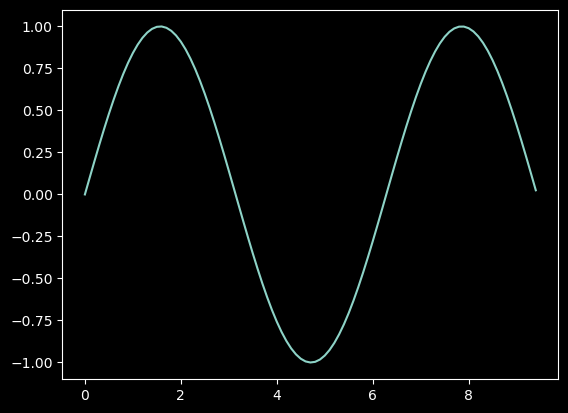

In [108]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

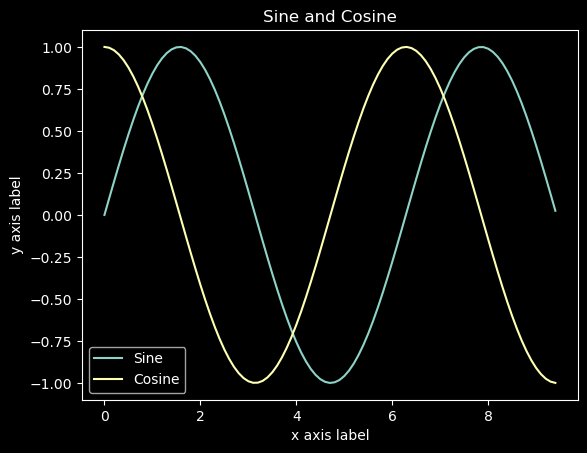

In [109]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

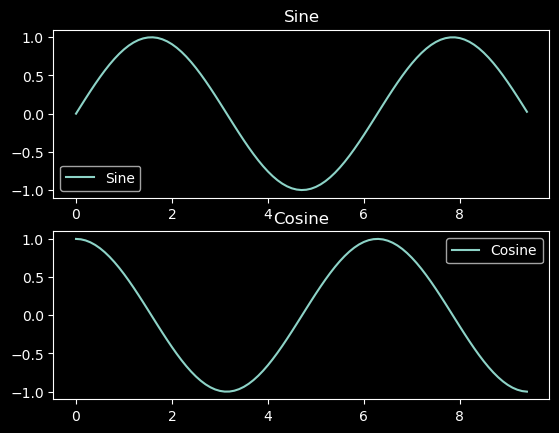

In [110]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')
plt.legend(['Sine'])

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')
plt.legend(['Cosine'])

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot).

Useful to know:
- `plt.subplots()` returns two objects: `Figure` and `Axes`;
- `Figure` represents the whole container of the plot;
- `Axes` contains most of the elements in the figure;
- `ax` can be either a single `Axes` object or an array of `Axes` objects if more than one subplot was created.
- The `ax` object allows the plotting of data;
- `savefig()` on a `Figure` object allows you to save the plot in a file.
- more in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots).

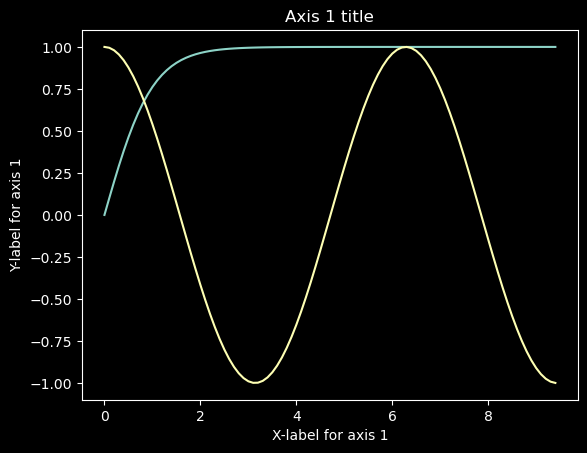

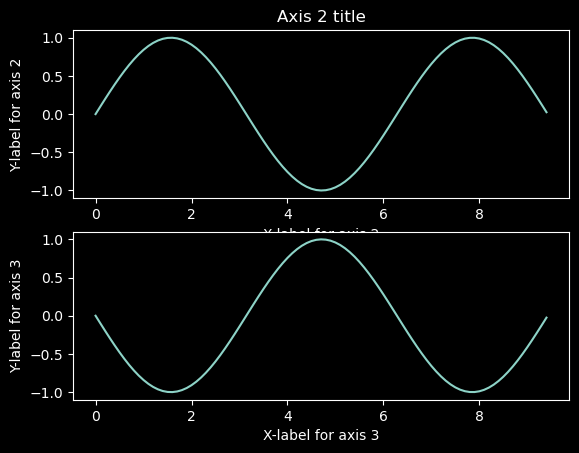

In [111]:
import numpy as np

x = np.arange(0, 3 * np.pi, 0.1)
y = np.tanh(x)
z = np.sin(x)
w = np.cos(x)

fig1, ax1 = plt.subplots()                        # only a single axes
ax1.plot(x, y)                                    # Plotting on the particular axes
ax1.set_title("Axis 1 title")
ax1.set_xlabel("X-label for axis 1")
ax1.set_ylabel("Y-label for axis 1")

fig2, (ax2, ax3) = plt.subplots(nrows=2, ncols=1) # two axes on figure
ax2.plot(x, z)
ax2.set_title("Axis 2 title")
ax2.set_xlabel("X-label for axis 2")
ax2.set_ylabel("Y-label for axis 2")

ax3.plot(x, -z)
ax3.set_xlabel("X-label for axis 3")
ax3.set_ylabel("Y-label for axis 3")

ax1.plot(x, w)                                    # can continue plotting on the first axis
fig1.savefig("fig1.pdf")
fig2.savefig("fig2.pdf")
fig2.savefig("fig2.jpg")
fig2.savefig("fig2.png")

## Pandas

Python Pandas is one of the most widely used Python packages. This package comprises many data structures and tools for effective data manipulation and analysis.

Pandas provide two convenient data structures for storing and manipulating data: **Series** and **DataFrame**. A *Series* is similar to a one-dimensional array whereas a *DataFrame* is a tabular representation akin to a spreadsheet table.

The very first and the most important operation is to import Python Pandas library properly.

In [112]:
import pandas as pd

### Pandas Series Objects (Can be Skipped)

A series is a **list of indexed mixed data**. A series object can contain any type of data, including mixed types. Now, let’s have a look at how we can create series objects in Python Pandas with some examples.

In [113]:
series1 = pd.Series([10, 20, 30, 40])
print(series1)
print(type(series1))

0    10
1    20
2    30
3    40
dtype: int64
<class 'pandas.core.series.Series'>


We can export the values in a Numpy array and access the data through an index:

In [114]:
# Export in a Numpy array
print(series1.values)

# Show the indexes of the data
print(series1.index)

# Access data by index
print(series1[2])

# Inspect datatypes
print(series1.dtype)

[10 20 30 40]
RangeIndex(start=0, stop=4, step=1)
30
int64


In [115]:
# Further we can specify the index the of the series object as shown below:

series2 = pd.Series([1.2, 2.55, 3.1, 4], index=['a', 'b', 'c', 'd'])
print(f"{series2}\n")
print(series2.values)
print(series2.index)
print(series2[2])
print(series2['c'])
print(series2.dtype)

a    1.20
b    2.55
c    3.10
d    4.00
dtype: float64

[1.2  2.55 3.1  4.  ]
Index(['a', 'b', 'c', 'd'], dtype='object')
3.1
3.1
float64


/tmp/nix-shell.UFOCiN/ipykernel_22720/3724176405.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(series2[2])


In [116]:
# Series can be built from a dictionary where keys are used as indexes

score = {"Jane":90, "Bill":80, "Elon":85, "Tom":75, "Tim":95}
series3 = pd.Series(score) # Convert to Series 
print(series3)
print(series3.values)
print(series3.index)
print(series3['Jane'])
print(series3.dtype)

Jane    90
Bill    80
Elon    85
Tom     75
Tim     95
dtype: int64
[90 80 85 75 95]
Index(['Jane', 'Bill', 'Elon', 'Tom', 'Tim'], dtype='object')
90
int64


In [117]:
# Series can be accessed through slicing

print(series3[1:3])      # Print second and third line

Bill    80
Elon    85
dtype: int64


There are various functions available to find the number of elements in a Series. Result of the function depends on whether null elements are included.

In [118]:
series3['Jane'] = np.nan
print(f'Series s3:\n{series3}\n')

print(f'Shape of s3 = {series3.shape}')   # get the dimension of the Series
print(f'Size of s3 = {series3.size}')     # get the number of elements of the Series
print(f'Count of s3 = {series3.count()}') # get the number of non-null elements of the Series

Series s3:
Jane     NaN
Bill    80.0
Elon    85.0
Tom     75.0
Tim     95.0
dtype: float64

Shape of s3 = (5,)
Size of s3 = 5
Count of s3 = 4


We can perform queries, assignments and queries + assignments on series:

In [119]:
# query
print("Boolean mask for players with score >= 85")
print(series3 >= 85)
print("--------------------")
print("\nAll players with score >= 85")
print(series3[series3 >= 85])

Boolean mask for players with score >= 85
Jane    False
Bill    False
Elon     True
Tom     False
Tim      True
dtype: bool
--------------------

All players with score >= 85
Elon    85.0
Tim     95.0
dtype: float64


In [120]:
# assignment
print("\nNew score for Tom")
series3["Tom"] = 60
print(series3)


New score for Tom
Jane     NaN
Bill    80.0
Elon    85.0
Tom     60.0
Tim     95.0
dtype: float64


In [121]:
# assignment after a query
print("\nIncrease score for player with score <= 80")
series3[series3 <= 80] = 83
print(series3)


Increase score for player with score <= 80
Jane     NaN
Bill    83.0
Elon    85.0
Tom     83.0
Tim     95.0
dtype: float64


Similarly to Numpy, we can perform operations on Pandas Series:

In [122]:
print(series3/10, "\n")
print(series3**2, "\n")
print(series3.isnull(), "\n")
print(np.log(series3 + 4), "\n")

Jane    NaN
Bill    8.3
Elon    8.5
Tom     8.3
Tim     9.5
dtype: float64 

Jane       NaN
Bill    6889.0
Elon    7225.0
Tom     6889.0
Tim     9025.0
dtype: float64 

Jane     True
Bill    False
Elon    False
Tom     False
Tim     False
dtype: bool 

Jane         NaN
Bill    4.465908
Elon    4.488636
Tom     4.465908
Tim     4.595120
dtype: float64 



The `value_counts()` function can be used for tabulating the counts of each discrete value in the Series.

In [123]:
colors = pd.Series(['red', 'blue', 'blue', 'yellow', 'red', 'green', 'blue', np.nan])
print(f'colors:\n{colors}\n')

print(f'colors.value_counts():\n{colors.value_counts(ascending=True)}') # Default ascending=False

colors:
0       red
1      blue
2      blue
3    yellow
4       red
5     green
6      blue
7       NaN
dtype: object

colors.value_counts():
green     1
yellow    1
red       2
blue      3
Name: count, dtype: int64


### Python Pandas DataFrames

DataFrames in Pandas are defined as **2-axes indexed and labeled data structures** with columns of potentially different Python Data types. Each columns is a Pandas Series:

<img src="pandasDf.webp" width="650" style="margin:auto"/>

Unlike Series, a DataFrame has distinct row and column indices. There are many ways to create a DataFrame object (e.g., from a dictionary, list of tuples, or even numpy's ndarrays).

In [124]:
# Dataframe can be built from dictionaries too, no need to pass column names
data = {"name":["Bill","Tom","Tim","John","Alex","Vanessa","Kate"],
        "score":[90,80,85,75,95,60,65],
        "sport":["Wrestling","Football","Skiing","Swimming","Tennis", "Karate","Surfing"],      
        "sex":["M","M","M","M","F","F","F"]}

df1 = pd.DataFrame(data)
print(df1)
print('\n')

# columns shape are useful attributes for knowing your data!
print(f"Dataframe has {df1.columns} columns")
print(f"Dataframe has {df1.shape} shape")
print(f"Dataframe has {df1.index} row indexes")

# len gives you the number of samples
print(f"Dataframe has {len(df1)} samples.\n")

# info gives you an overview of your data
df1.info()

      name  score      sport sex
0     Bill     90  Wrestling   M
1      Tom     80   Football   M
2      Tim     85     Skiing   M
3     John     75   Swimming   M
4     Alex     95     Tennis   F
5  Vanessa     60     Karate   F
6     Kate     65    Surfing   F


Dataframe has Index(['name', 'score', 'sport', 'sex'], dtype='object') columns
Dataframe has (7, 4) shape
Dataframe has RangeIndex(start=0, stop=7, step=1) row indexes
Dataframe has 7 samples.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7 non-null      object
 1   score   7 non-null      int64 
 2   sport   7 non-null      object
 3   sex     7 non-null      object
dtypes: int64(1), object(3)
memory usage: 356.0+ bytes


In [125]:
# Dataframe can be built from lists
data2 = [['apple', 10], ['mango', 12],['banana', 13],['berry', 20]]
df2 = pd.DataFrame(data2, columns=['fruit', 'count'])
print(df2, '\n')
df2.info()

    fruit  count
0   apple     10
1   mango     12
2  banana     13
3   berry     20 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fruit   4 non-null      object
 1   count   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


Creating DataFrame from numpy ndarray

In [126]:
npdata = np.random.randn(5, 3)  # create a 5 by 3 random matrix
columnNames = ['x1','x2','x3']
npdata_df = pd.DataFrame(npdata, columns=columnNames)
npdata_df

,x1,x2,x3
0,0.504571,1.248353,1.196754
1,1.843688,0.557182,0.637634
2,-1.859460,1.222769,-0.595641
3,-0.624576,-0.158913,0.401946
4,2.523545,0.169130,0.710644


`head(N)` and `tail(N)` methods allow you to inspect the first `N` rows of a dataframe:

In [127]:
print(df1.head())
print('\n')
print(df1.head(2))
print('\n')
print(df1.tail())
print('\n')
print(df1.tail(3))

   name  score      sport sex
0  Bill     90  Wrestling   M
1   Tom     80   Football   M
2   Tim     85     Skiing   M
3  John     75   Swimming   M
4  Alex     95     Tennis   F


   name  score      sport sex
0  Bill     90  Wrestling   M
1   Tom     80   Football   M


      name  score     sport sex
2      Tim     85    Skiing   M
3     John     75  Swimming   M
4     Alex     95    Tennis   F
5  Vanessa     60    Karate   F
6     Kate     65   Surfing   F


      name  score    sport sex
4     Alex     95   Tennis   F
5  Vanessa     60   Karate   F
6     Kate     65  Surfing   F


#### Accessing dataframes

We can access to dataframe by column names or indexes:

In [128]:
df3 = pd.DataFrame(data,columns=["name", "sport", "gender", "score", "age"],
                   index=["one","two","three","four","five","six","seven"])
print(df3, '\n')
print(df3.dtypes)

          name      sport gender  score  age
one       Bill  Wrestling    NaN     90  NaN
two        Tom   Football    NaN     80  NaN
three      Tim     Skiing    NaN     85  NaN
four      John   Swimming    NaN     75  NaN
five      Alex     Tennis    NaN     95  NaN
six    Vanessa     Karate    NaN     60  NaN
seven     Kate    Surfing    NaN     65  NaN 

name      object
sport     object
gender    object
score      int64
age       object
dtype: object


In [129]:
# accessing by single column name
print(df3["sport"])

# accessuing by multiple column names
print('\n')
my_columns = ["name", "sport"]
print(df3[my_columns])

# accessing by column name as an attribute
print('\n')
print(df3.sport)
print(type(df3.sport))

one      Wrestling
two       Football
three       Skiing
four      Swimming
five        Tennis
six         Karate
seven      Surfing
Name: sport, dtype: object


          name      sport
one       Bill  Wrestling
two        Tom   Football
three      Tim     Skiing
four      John   Swimming
five      Alex     Tennis
six    Vanessa     Karate
seven     Kate    Surfing


one      Wrestling
two       Football
three       Skiing
four      Swimming
five        Tennis
six         Karate
seven      Surfing
Name: sport, dtype: object
<class 'pandas.core.series.Series'>


Rows can be accessed by the `loc` and `iloc` operators:
    
- `.loc[]` is primarily label based, but may also be used with a boolean array;
- `.iloc[]` is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

In [130]:
# accessing by location/row index is performed with the .loc[] operator
print('\n')
print(df3.loc["one", ["name", "sport"]])
print('\n')
print(df3.loc[["one","two"]])



name          Bill
sport    Wrestling
Name: one, dtype: object


     name      sport gender  score  age
one  Bill  Wrestling    NaN     90  NaN
two   Tom   Football    NaN     80  NaN


In [131]:
# slicing and location by integer is performed with the .iloc[] operator
print('\n')
print(df3.iloc[0, :2])
print('\n')
print(df3.iloc[[0, 1], :])



name          Bill
sport    Wrestling
Name: one, dtype: object


     name      sport gender  score  age
one  Bill  Wrestling    NaN     90  NaN
two   Tom   Football    NaN     80  NaN


More on Pandas accessing to data can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

Assignment and column delection can be easily perfomed:

In [132]:
values = [18, 19, 20, 18, 17, 17, 18]

# Example of new column creation
df3["age"] = values
print(df3, '\n')

# Example of new column creation
df3["pass"] = df3.score >= 70
print(df3, '\n')

# Example of column deletion
del df3["pass"]
print(df3, '\n')

          name      sport gender  score  age
one       Bill  Wrestling    NaN     90   18
two        Tom   Football    NaN     80   19
three      Tim     Skiing    NaN     85   20
four      John   Swimming    NaN     75   18
five      Alex     Tennis    NaN     95   17
six    Vanessa     Karate    NaN     60   17
seven     Kate    Surfing    NaN     65   18 

          name      sport gender  score  age   pass
one       Bill  Wrestling    NaN     90   18   True
two        Tom   Football    NaN     80   19   True
three      Tim     Skiing    NaN     85   20   True
four      John   Swimming    NaN     75   18   True
five      Alex     Tennis    NaN     95   17   True
six    Vanessa     Karate    NaN     60   17  False
seven     Kate    Surfing    NaN     65   18  False 

          name      sport gender  score  age
one       Bill  Wrestling    NaN     90   18
two        Tom   Football    NaN     80   19
three      Tim     Skiing    NaN     85   20
four      John   Swimming    NaN     75 

### Arithmetic operations

In [133]:
npdata = np.random.randn(5, 3)  # create a 5 by 3 random matrix
columnNames = ['x1','x2','x3']
npdata_df = pd.DataFrame(npdata, columns=columnNames)

print(npdata_df)

print('\nData transpose operation: data.T')
print(npdata_df.T)    # transpose operation

print('\nAddition: data + 4')
print(npdata_df + 4)    # addition operation

print('\nMultiplication: data * 10')
print(npdata_df * 10)   # multiplication operation

         x1        x2        x3
0  0.858004 -0.926732  1.087743
1 -1.184403 -0.639906  1.168020
2  0.041458  1.301304  0.574051
3  0.957737  0.338625 -0.430691
4  0.985716  0.252226  0.411862

Data transpose operation: data.T
           0         1         2         3         4
x1  0.858004 -1.184403  0.041458  0.957737  0.985716
x2 -0.926732 -0.639906  1.301304  0.338625  0.252226
x3  1.087743  1.168020  0.574051 -0.430691  0.411862

Addition: data + 4
         x1        x2        x3
0  4.858004  3.073268  5.087743
1  2.815597  3.360094  5.168020
2  4.041458  5.301304  4.574051
3  4.957737  4.338625  3.569309
4  4.985716  4.252226  4.411862

Multiplication: data * 10
          x1         x2         x3
0   8.580040  -9.267323  10.877425
1 -11.844030  -6.399063  11.680200
2   0.414579  13.013041   5.740512
3   9.577367   3.386252  -4.306910
4   9.857163   2.522255   4.118625


### Sumary statistics of the data

Pandas allows the visualization of some descriptive statistics: `describe`, `value_counts`, `unique`, `mean`:

In [134]:
# Descriptive statistics
print('Descriptive statistics')
print(df3.describe(), '\n')

# value counts
print('Value count for age')
print(df3['age'].value_counts(), '\n')

# value counts frequency
print('Age frequency')
print(df3['age'].value_counts(normalize=True), '\n')

# return unique elements
print('Unique elements for age')
print(df3['age'].unique(), '\n')

# mean
print('Mean of score and age')
print(df3['score'].mean(), df3['age'].mean(), '\n')

print('\nMaximum value per column:')
print(df3.max())    # get maximum value for each column

print('\nSum of values per column:')
print(df3.sum())    # get sum of values for each column

print('\nAverage value per row:')
print(df3[['score', 'age']].mean(axis=1))    # get average value for each row

Descriptive statistics
           score        age
count   7.000000   7.000000
mean   78.571429  18.142857
std    12.817399   1.069045
min    60.000000  17.000000
25%    70.000000  17.500000
50%    80.000000  18.000000
75%    87.500000  18.500000
max    95.000000  20.000000 

Value count for age
age
18    3
17    2
19    1
20    1
Name: count, dtype: int64 

Age frequency
age
18    0.428571
17    0.285714
19    0.142857
20    0.142857
Name: proportion, dtype: float64 

Unique elements for age
[18 19 20 17] 

Mean of score and age
78.57142857142857 18.142857142857142 


Maximum value per column:
name        Vanessa
sport     Wrestling
gender         None
score            95
age              20
dtype: object

Sum of values per column:
name                          BillTomTimJohnAlexVanessaKate
sport     WrestlingFootballSkiingSwimmingTennisKarateSur...
gender                                                    0
score                                                   550
age              

### Plotting Series and DataFrame

There are many built-in functions available to nicely plot the data stored in a Series or a DataFrame:

1. line plot;
2. bar plot;
3. histograms;
4. Box plot;
5. Scatter plot.

#### 1 Line plot

<Axes: title={'center': 'Line plot'}>

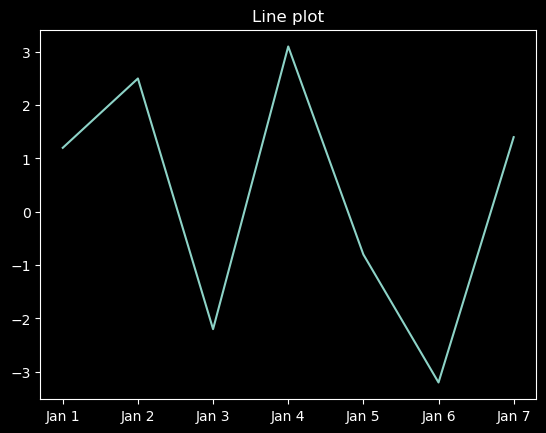

In [135]:
s3 = pd.Series([1.2,2.5,-2.2,3.1,-0.8,-3.2,1.4], index = ['Jan 1','Jan 2','Jan 3','Jan 4','Jan 5','Jan 6','Jan 7'])
s3.plot(kind='line', title='Line plot')

#### 2. Bar plot

<Axes: title={'center': 'Bar plot'}>

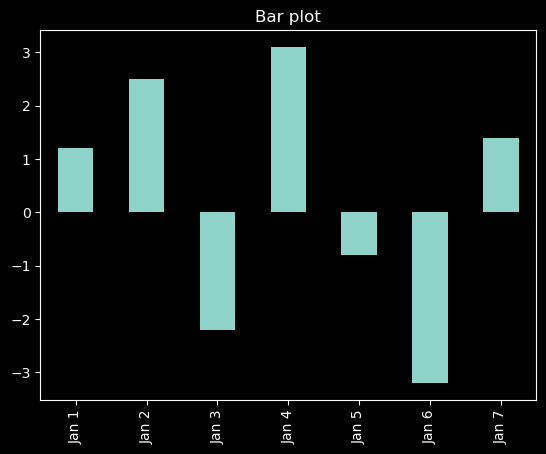

In [136]:
# Months example
s3.plot(kind='bar', title='Bar plot')

<Axes: title={'center': 'Bar plot'}, xlabel='age'>

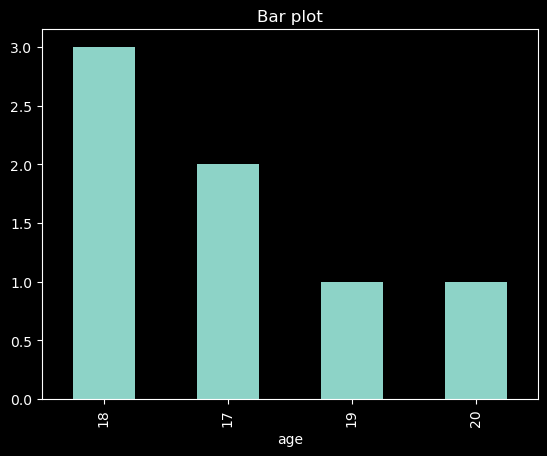

In [137]:
# Age example
df3['age'].value_counts().plot(kind="bar", title='Bar plot')

**3. Histograms**

<Axes: ylabel='Frequency'>

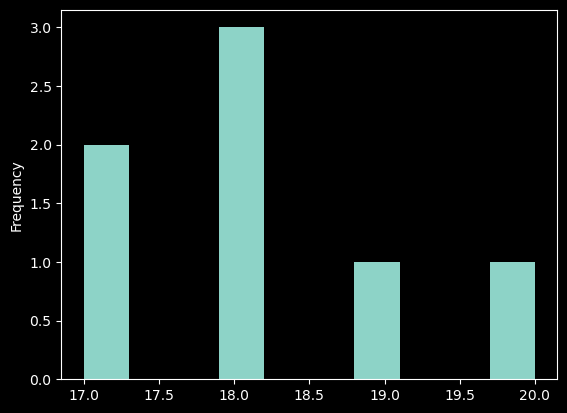

In [138]:
# Age example
df3['age'].plot(kind="hist")

#### 4. Box plot

weatherData:
   year  temp  precip
0  2011  45.1    32.4
1  2012  42.4    34.5
2  2013  47.2    39.2
3  2014  44.2    31.4
4  2015  39.9    29.8
5  2016  41.5    36.7
[39.9 41.5 42.4 44.2 45.1 47.2]
[29.8 31.4 32.4 34.5 36.7 39.2]


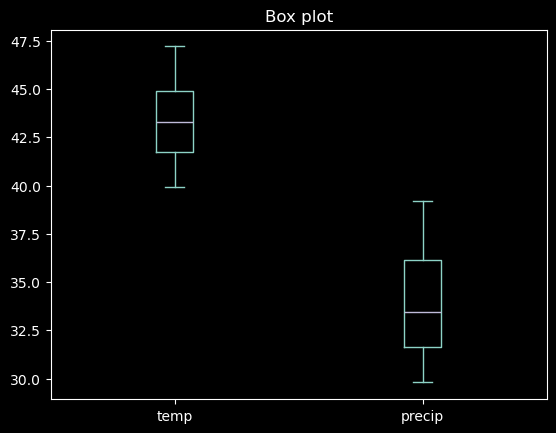

In [139]:
tuplelist = [(2011,45.1,32.4),(2012,42.4,34.5),(2013,47.2,39.2),
              (2014,44.2,31.4),(2015,39.9,29.8),(2016,41.5,36.7)]
columnNames = ['year','temp','precip']
weatherData = pd.DataFrame(tuplelist, columns=columnNames)
print(f'weatherData:\n{weatherData}')

weatherData[['temp','precip']].plot(kind='box', title='Box plot')
print(np.sort(weatherData['temp'].values))
print(np.sort(weatherData['precip'].values))

#### 5. Scatter plot

<Axes: xlabel='temp', ylabel='precip'>

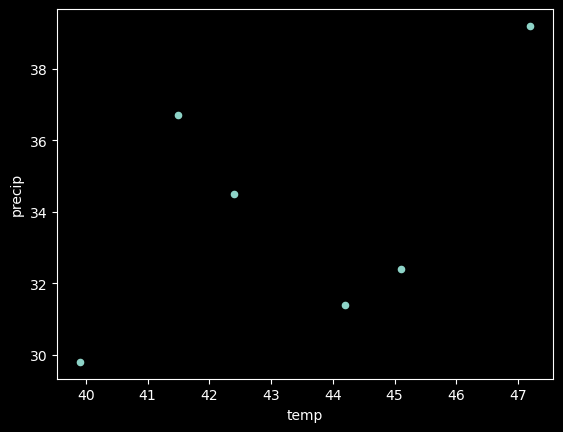

In [140]:
weatherData.plot(kind='scatter', x='temp', y='precip')

<Axes: xlabel='temp', ylabel='year'>

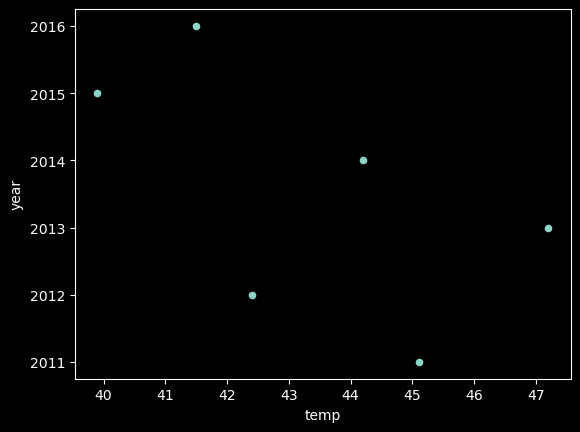

In [141]:
weatherData.plot(kind='scatter', x='temp', y='year')